In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
raw_data = pd.read_csv('/content/spam.csv', encoding='latin1')
select_columns = ['v1', 'v2']
filter_data = raw_data[select_columns]

In [3]:

print(filter_data)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [4]:
data=filter_data.where((pd.notnull(filter_data)),'')

In [5]:
data.shape

(5572, 2)

In [6]:
data.loc[data['v1']=='spam','v1',]=0
data.loc[data['v1']=='ham','v1',]=1

In [7]:
spam_count = data['v1'].value_counts()[0]
ham_indices = data[data['v1'] == 1].index
random_indices = np.random.choice(ham_indices, spam_count, replace=False)
balanced_indices = np.concatenate([data[data['v1'] == 0].index, random_indices])
balanced_data = data.loc[balanced_indices]

In [8]:
x = balanced_data['v2']
y = balanced_data['v1']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
print(x.shape)
print(x_train.shape)
print(x_test.shape)


(1494,)
(1195,)
(299,)


In [10]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
x_train_features=feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)

In [11]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

model=svm.SVC()
model.fit(x_train_features,y_train)

predictions = model.predict(x_train_features)
accuracy = accuracy_score(y_train, predictions)


print("Accuracy on training data is: ",accuracy)

Accuracy on training data is:  0.998326359832636


In [12]:
predictions_test = model.predict(x_test_features)
accuracy = accuracy_score(y_test, predictions_test)

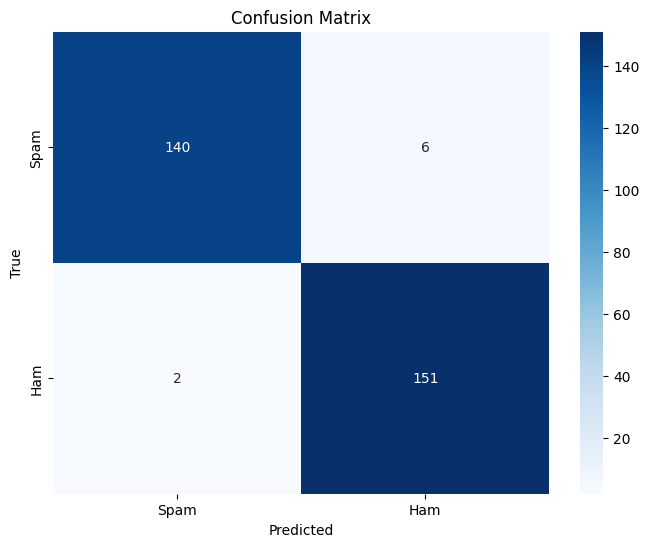

In [14]:
cm = confusion_matrix(y_test, predictions_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
print("Classification Report on testing data:\n", classification_report(y_test, predictions_test))


Classification Report on testing data:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       146
           1       0.96      0.99      0.97       153

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299



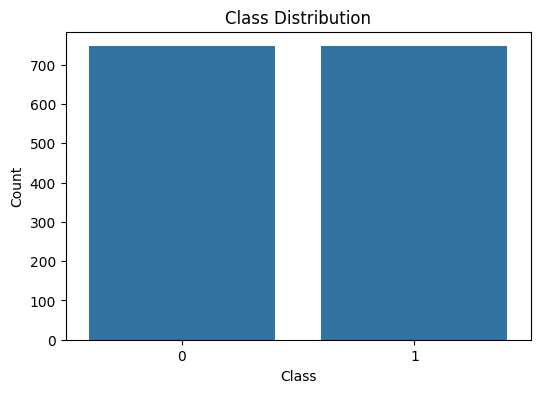

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='v1', data=balanced_data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()




In [17]:
input=["FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"]

In [18]:
input_data_features=feature_extraction.transform(input)

In [19]:
predictions=model.predict(input_data_features)

if predictions[0]==1:
  print('Not spam mail')
else:
  print('Spam mail')

Spam mail
